In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Writes ccptraj script
def write_cpptraj_script (name, parmtop, trajectory, protein_length, window):
    # this subroutine writes a script for execution by cpptraj 
    f = open(name+"_distance_"+str(window)+".cpptraj", "w")
    f.write("parm ")
    f.write(parmtop)
    f.write("\n")
    f.write("trajin ")
    f.write(trajectory)
    f.write("\n")
    #f.write("resinfo out resinfo.txt")
    #f.write("\n")
    upper_limit = protein_length + 1 - window #max protein length + 1
    for x in range (1,upper_limit):
        f.write("distance :")
        f.write(str(x))
        f.write(" :")
        f.write(str(x + window))
        f.write(" out ")
        f.write(name)
        f.write(".lccdata")
        f.write("\n")
    f.close()

# Read in prmtop and tractory data and execute internal distance measurements

In [3]:
%%capture
protein_length=70
window = 20
write_cpptraj_script("myc_091-160_D132-H", "myc_091-160_D132-H_stripped.prmtop", "aMD_091-160_D132-H_no1-4_stripped.nc", protein_length, window)
#!cpptraj < distance.cpptraj
#!rm distance.cpptraj

In [4]:
%%capture
protein_length=70

window_range = list(range(2,51))

for window in window_range:
    write_cpptraj_script("wildtype_{}".format(window), "myc_091-160_stripped.prmtop", "aMD_091-160_no1-4_stripped.nc", protein_length, window)
    write_cpptraj_script("myc_091-160_D132-H_{}".format(window), "myc_091-160_D132-H_stripped.prmtop", "aMD_091-160_D132-H_no1-4_stripped.nc", protein_length, window)

## Visualization of the Local Compation Plot
The intensity of the LCC curves is controlled by the number of frames read in 
(currently only every tenth frame - see last number in the for loop command in line 7) and by the intesity setting (alpha in line 9; note that alpha = 0.002 is the lowest possible setting). 
Reading in too many frames, or setting the alpha value too high, will yield a rather dark plot that does not show any detailed features. 

Number of trajectory frames read in:  40000


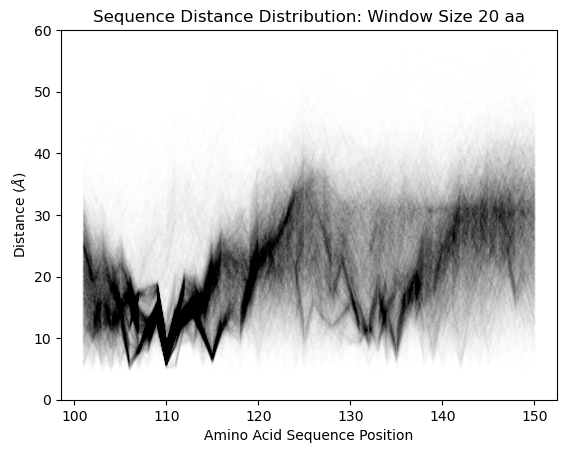

In [5]:
plt.clf()
mutant_1_data = np.loadtxt('1_mutant_D132-H.lcc')
frame_number = mutant_1_data.shape[0] #get the number of frames read
window = 20
print ("Number of trajectory frames read in: ", frame_number)
upper_limit = 70 + 1 - window #max protein length + 1
x_axis = np.arange(1 + window / 2 ,upper_limit + window / 2) + 90

for z in range (0,frame_number,10):
    y=mutant_1_data[z] #read row for distances along primary sequence    
    plt.plot(x_axis, mutant_1_data[z,1:], color = 'black', alpha=0.002) #avoid reading header in y

plt.ylim(0,60)
plt.xlabel('Amino Acid Sequence Position')  
plt.ylabel('Distance ($\AA$)')  #Angstrom
plot_name = 'Sequence Distance Distribution: Window Size ' + str(window) + ' aa'
plt.title(plot_name) 
figure_name = "local_compaction_plot_" + str(window) + ".png"
plt.savefig(figure_name, dpi = 300)
plt.show()

Number of trajectory frames read in:  40000


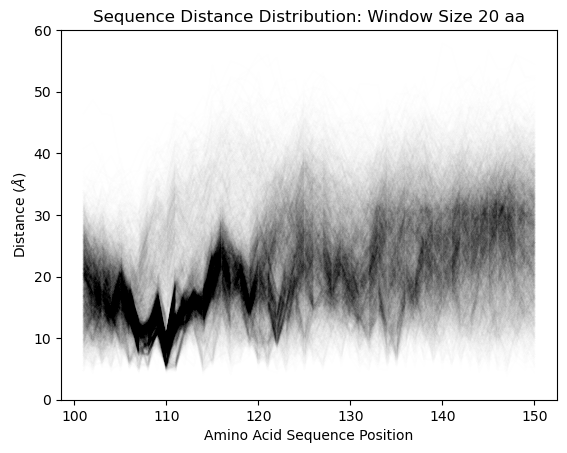

In [6]:
plt.clf()
wildtype_data = np.loadtxt('0_wildtype.lcc')
frame_number = mutant_1_data.shape[0] #get the number of frames read
print ("Number of trajectory frames read in: ", frame_number)
window = 20
upper_limit = 70 + 1 - window #max protein length + 1
x_axis = np.arange(1 + window / 2 ,upper_limit + window / 2) + 90

for z in range (0,frame_number,10):
    y=wildtype_data[z] #read row for distances along primary sequence    
    plt.plot(x_axis, wildtype_data[z,1:], color = 'black', alpha=0.002) #avoid reading header in y

plt.ylim(0,60)
plt.xlabel('Amino Acid Sequence Position')  
plt.ylabel('Distance ($\AA$)')  #Angstrom
plot_name = 'Sequence Distance Distribution: Window Size ' + str(window) + ' aa'
plt.title(plot_name) 
figure_name = "local_compaction_plot_" + str(window) + ".png"
plt.savefig(figure_name, dpi = 300)
plt.show()

## LCC data for distinct window sizes


In [7]:
def write_cpptraj_script (name, parmtop, trajectory, protein_length, window):
    # this subroutine writes a script for execution by cpptraj 
    f = open(name+"_distance_"+str(window)+".cpptraj", "w")
    f.write("parm ")
    f.write(parmtop)
    f.write("\n")
    f.write("trajin ")
    f.write(trajectory)
    f.write("\n")
    #f.write("resinfo out resinfo.txt")
    #f.write("\n")
    upper_limit = protein_length + 1 - window #max protein length + 1
    for x in range (1,upper_limit):
        f.write("distance :")
        f.write(str(x))
        f.write(" :")
        f.write(str(x + window))
        f.write(" out ")
        f.write(name)
        f.write(".lccdata")
        f.write("\n")
    f.close()

In [8]:
%%capture
protein_length=70

window_range = list(range(2,51))

for window in window_range:
    write_cpptraj_script("wildtype_"+str(window), "myc_091-160_stripped.prmtop", "aMD_091-160_no1-4_stripped.nc", protein_length, window)
    write_cpptraj_script("myc_091-160_D132-H_"+str(window), "myc_091-160_D132-H_stripped.prmtop", "aMD_091-160_D132-H_no1-4_stripped.nc", protein_length, window)

#### Window Size: 2

In [9]:
!cpptraj < wildtype_2_distance_2.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:04:28
| Available memory: 7.097 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :3 out wildtype_2.lccdata]
    DISTANCE: :1 to :3, center of mass.
  [distance :2 :4 out wildtype_2.lccdata]
    DISTANCE: :2 to :4, center of mass.
  [distance :3 :5 out wildtype_2.lccdata]
    DISTANCE: :3 to :5, center of mass.
  [distance :4 :6 out wildtype_2.lccdata]
    DISTANCE: :4 to :6, center of mass.
  [distance :5 :7 out wildtype_2.lccdata]
    DISTANCE: :5 to :7, center of mass.
  [distance :6 :8 out wildtype_2.lccdata]
    DISTANCE: :6 to :8, center of mass.
  [distance :7 :9 out wildtype_2.lccdata]
    DISTANCE: 

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 50439.3901 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (68 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

In [10]:
!cpptraj < myc_091-160_D132-H_2_distance_2.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:04:30
| Available memory: 6.586 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :3 out myc_091-160_D132-H_2.lccdata]
    DISTANCE: :1 to :3, center of mass.
  [distance :2 :4 out myc_091-160_D132-H_2.lccdata]
    DISTANCE: :2 to :4, center of mass.
  [distance :3 :5 out myc_091-160_D132-H_2.lccdata]
    DISTANCE: :3 to :5, center of mass.
  [distance :4 :6 out myc_091-160_D132-H_2.lccdata]
    DISTANCE: :4 to :6, center of mass.
  [distance :5 :7 out myc_091-160_D132-H_2.lccdata]
    DISTANCE: :5 to :7, center of mass.
  [distance :6 :8 out myc_091-160_D132-H_2.lccdata]
    DIST

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 54077.6582 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (68 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

#### Window Size: 3

In [11]:
!cpptraj < wildtype_3_distance_3.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:04:32
| Available memory: 6.016 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :4 out wildtype_3.lccdata]
    DISTANCE: :1 to :4, center of mass.
  [distance :2 :5 out wildtype_3.lccdata]
    DISTANCE: :2 to :5, center of mass.
  [distance :3 :6 out wildtype_3.lccdata]
    DISTANCE: :3 to :6, center of mass.
  [distance :4 :7 out wildtype_3.lccdata]
    DISTANCE: :4 to :7, center of mass.
  [distance :5 :8 out wildtype_3.lccdata]
    DISTANCE: :5 to :8, center of mass.
  [distance :6 :9 out wildtype_3.lccdata]
    DISTANCE: :6 to :9, center of mass.
  [distance :7 :10 out wildtype_3.lccdata]
    DISTANCE:

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 89531.1255 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (67 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

In [12]:
!cpptraj < myc_091-160_D132-H_3_distance_3.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:04:33
| Available memory: 5.988 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :4 out myc_091-160_D132-H_3.lccdata]
    DISTANCE: :1 to :4, center of mass.
  [distance :2 :5 out myc_091-160_D132-H_3.lccdata]
    DISTANCE: :2 to :5, center of mass.
  [distance :3 :6 out myc_091-160_D132-H_3.lccdata]
    DISTANCE: :3 to :6, center of mass.
  [distance :4 :7 out myc_091-160_D132-H_3.lccdata]
    DISTANCE: :4 to :7, center of mass.
  [distance :5 :8 out myc_091-160_D132-H_3.lccdata]
    DISTANCE: :5 to :8, center of mass.
  [distance :6 :9 out myc_091-160_D132-H_3.lccdata]
    DIST

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 88476.5880 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (67 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

#### Window Size: 4

In [13]:
!cpptraj < wildtype_4_distance_4.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:04:35
| Available memory: 5.939 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :5 out wildtype_4.lccdata]
    DISTANCE: :1 to :5, center of mass.
  [distance :2 :6 out wildtype_4.lccdata]
    DISTANCE: :2 to :6, center of mass.
  [distance :3 :7 out wildtype_4.lccdata]
    DISTANCE: :3 to :7, center of mass.
  [distance :4 :8 out wildtype_4.lccdata]
    DISTANCE: :4 to :8, center of mass.
  [distance :5 :9 out wildtype_4.lccdata]
    DISTANCE: :5 to :9, center of mass.
  [distance :6 :10 out wildtype_4.lccdata]
    DISTANCE: :6 to :10, center of mass.
  [distance :7 :11 out wildtype_4.lccdata]
    DISTANC

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 96180.2032 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (66 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

In [14]:
!cpptraj < myc_091-160_D132-H_4_distance_4.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:04:36
| Available memory: 5.910 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :5 out myc_091-160_D132-H_4.lccdata]
    DISTANCE: :1 to :5, center of mass.
  [distance :2 :6 out myc_091-160_D132-H_4.lccdata]
    DISTANCE: :2 to :6, center of mass.
  [distance :3 :7 out myc_091-160_D132-H_4.lccdata]
    DISTANCE: :3 to :7, center of mass.
  [distance :4 :8 out myc_091-160_D132-H_4.lccdata]
    DISTANCE: :4 to :8, center of mass.
  [distance :5 :9 out myc_091-160_D132-H_4.lccdata]
    DISTANCE: :5 to :9, center of mass.
  [distance :6 :10 out myc_091-160_D132-H_4.lccdata]
    DIS

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 98147.7074 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (66 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

#### Window size: 5

In [15]:
!cpptraj < wildtype_5_distance_5.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:04:38
| Available memory: 5.878 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :6 out wildtype_5.lccdata]
    DISTANCE: :1 to :6, center of mass.
  [distance :2 :7 out wildtype_5.lccdata]
    DISTANCE: :2 to :7, center of mass.
  [distance :3 :8 out wildtype_5.lccdata]
    DISTANCE: :3 to :8, center of mass.
  [distance :4 :9 out wildtype_5.lccdata]
    DISTANCE: :4 to :9, center of mass.
  [distance :5 :10 out wildtype_5.lccdata]
    DISTANCE: :5 to :10, center of mass.
  [distance :6 :11 out wildtype_5.lccdata]
    DISTANCE: :6 to :11, center of mass.
  [distance :7 :12 out wildtype_5.lccdata]
    DISTA

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 96165.8669 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (65 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

In [16]:
!cpptraj < myc_091-160_D132-H_5_distance_5.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:04:39
| Available memory: 5.831 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :6 out myc_091-160_D132-H_5.lccdata]
    DISTANCE: :1 to :6, center of mass.
  [distance :2 :7 out myc_091-160_D132-H_5.lccdata]
    DISTANCE: :2 to :7, center of mass.
  [distance :3 :8 out myc_091-160_D132-H_5.lccdata]
    DISTANCE: :3 to :8, center of mass.
  [distance :4 :9 out myc_091-160_D132-H_5.lccdata]
    DISTANCE: :4 to :9, center of mass.
  [distance :5 :10 out myc_091-160_D132-H_5.lccdata]
    DISTANCE: :5 to :10, center of mass.
  [distance :6 :11 out myc_091-160_D132-H_5.lccdata]
    D

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 98225.0729 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (65 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

#### Window Size: 6

In [17]:
!cpptraj < wildtype_6_distance_6.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:04:41
| Available memory: 5.795 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :7 out wildtype_6.lccdata]
    DISTANCE: :1 to :7, center of mass.
  [distance :2 :8 out wildtype_6.lccdata]
    DISTANCE: :2 to :8, center of mass.
  [distance :3 :9 out wildtype_6.lccdata]
    DISTANCE: :3 to :9, center of mass.
  [distance :4 :10 out wildtype_6.lccdata]
    DISTANCE: :4 to :10, center of mass.
  [distance :5 :11 out wildtype_6.lccdata]
    DISTANCE: :5 to :11, center of mass.
  [distance :6 :12 out wildtype_6.lccdata]
    DISTANCE: :6 to :12, center of mass.
  [distance :7 :13 out wildtype_6.lccdata]
    DIS

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 95168.3051 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (64 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

In [18]:
!cpptraj < myc_091-160_D132-H_6_distance_6.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:04:42
| Available memory: 5.762 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :7 out myc_091-160_D132-H_6.lccdata]
    DISTANCE: :1 to :7, center of mass.
  [distance :2 :8 out myc_091-160_D132-H_6.lccdata]
    DISTANCE: :2 to :8, center of mass.
  [distance :3 :9 out myc_091-160_D132-H_6.lccdata]
    DISTANCE: :3 to :9, center of mass.
  [distance :4 :10 out myc_091-160_D132-H_6.lccdata]
    DISTANCE: :4 to :10, center of mass.
  [distance :5 :11 out myc_091-160_D132-H_6.lccdata]
    DISTANCE: :5 to :11, center of mass.
  [distance :6 :12 out myc_091-160_D132-H_6.lccdata]
   

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 98571.6961 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (64 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

#### Window Size: 7

In [19]:
!cpptraj < wildtype_7_distance_7.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:04:44
| Available memory: 5.732 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :8 out wildtype_7.lccdata]
    DISTANCE: :1 to :8, center of mass.
  [distance :2 :9 out wildtype_7.lccdata]
    DISTANCE: :2 to :9, center of mass.
  [distance :3 :10 out wildtype_7.lccdata]
    DISTANCE: :3 to :10, center of mass.
  [distance :4 :11 out wildtype_7.lccdata]
    DISTANCE: :4 to :11, center of mass.
  [distance :5 :12 out wildtype_7.lccdata]
    DISTANCE: :5 to :12, center of mass.
  [distance :6 :13 out wildtype_7.lccdata]
    DISTANCE: :6 to :13, center of mass.
  [distance :7 :14 out wildtype_7.lccdata]
    D

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 101252.2370 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (63 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

In [20]:
!cpptraj < myc_091-160_D132-H_7_distance_7.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:04:45
| Available memory: 5.703 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :8 out myc_091-160_D132-H_7.lccdata]
    DISTANCE: :1 to :8, center of mass.
  [distance :2 :9 out myc_091-160_D132-H_7.lccdata]
    DISTANCE: :2 to :9, center of mass.
  [distance :3 :10 out myc_091-160_D132-H_7.lccdata]
    DISTANCE: :3 to :10, center of mass.
  [distance :4 :11 out myc_091-160_D132-H_7.lccdata]
    DISTANCE: :4 to :11, center of mass.
  [distance :5 :12 out myc_091-160_D132-H_7.lccdata]
    DISTANCE: :5 to :12, center of mass.
  [distance :6 :13 out myc_091-160_D132-H_7.lccdata]
 

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 99523.0359 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (63 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

#### Window Size: 8

In [21]:
!cpptraj < wildtype_8_distance_8.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:04:47
| Available memory: 5.667 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :9 out wildtype_8.lccdata]
    DISTANCE: :1 to :9, center of mass.
  [distance :2 :10 out wildtype_8.lccdata]
    DISTANCE: :2 to :10, center of mass.
  [distance :3 :11 out wildtype_8.lccdata]
    DISTANCE: :3 to :11, center of mass.
  [distance :4 :12 out wildtype_8.lccdata]
    DISTANCE: :4 to :12, center of mass.
  [distance :5 :13 out wildtype_8.lccdata]
    DISTANCE: :5 to :13, center of mass.
  [distance :6 :14 out wildtype_8.lccdata]
    DISTANCE: :6 to :14, center of mass.
  [distance :7 :15 out wildtype_8.lccdata]
   

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 98876.2712 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (62 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

In [22]:
!cpptraj < myc_091-160_D132-H_8_distance_8.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:04:48
| Available memory: 5.634 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :9 out myc_091-160_D132-H_8.lccdata]
    DISTANCE: :1 to :9, center of mass.
  [distance :2 :10 out myc_091-160_D132-H_8.lccdata]
    DISTANCE: :2 to :10, center of mass.
  [distance :3 :11 out myc_091-160_D132-H_8.lccdata]
    DISTANCE: :3 to :11, center of mass.
  [distance :4 :12 out myc_091-160_D132-H_8.lccdata]
    DISTANCE: :4 to :12, center of mass.
  [distance :5 :13 out myc_091-160_D132-H_8.lccdata]
    DISTANCE: :5 to :13, center of mass.
  [distance :6 :14 out myc_091-160_D132-H_8.lccdata]

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 101858.4066 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (62 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

#### Window Size: 9

In [23]:
!cpptraj < wildtype_9_distance_9.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:04:50
| Available memory: 5.612 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :10 out wildtype_9.lccdata]
    DISTANCE: :1 to :10, center of mass.
  [distance :2 :11 out wildtype_9.lccdata]
    DISTANCE: :2 to :11, center of mass.
  [distance :3 :12 out wildtype_9.lccdata]
    DISTANCE: :3 to :12, center of mass.
  [distance :4 :13 out wildtype_9.lccdata]
    DISTANCE: :4 to :13, center of mass.
  [distance :5 :14 out wildtype_9.lccdata]
    DISTANCE: :5 to :14, center of mass.
  [distance :6 :15 out wildtype_9.lccdata]
    DISTANCE: :6 to :15, center of mass.
  [distance :7 :16 out wildtype_9.lccdata]
 

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 100272.2391 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (61 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

In [24]:
!cpptraj < myc_091-160_D132-H_9_distance_9.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:04:51
| Available memory: 5.581 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :10 out myc_091-160_D132-H_9.lccdata]
    DISTANCE: :1 to :10, center of mass.
  [distance :2 :11 out myc_091-160_D132-H_9.lccdata]
    DISTANCE: :2 to :11, center of mass.
  [distance :3 :12 out myc_091-160_D132-H_9.lccdata]
    DISTANCE: :3 to :12, center of mass.
  [distance :4 :13 out myc_091-160_D132-H_9.lccdata]
    DISTANCE: :4 to :13, center of mass.
  [distance :5 :14 out myc_091-160_D132-H_9.lccdata]
    DISTANCE: :5 to :14, center of mass.
  [distance :6 :15 out myc_091-160_D132-H_9.lccdat

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 99902.0959 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (61 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

#### Window Size 10

In [25]:
!cpptraj < wildtype_10_distance_10.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:04:53
| Available memory: 5.544 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :11 out wildtype_10.lccdata]
    DISTANCE: :1 to :11, center of mass.
  [distance :2 :12 out wildtype_10.lccdata]
    DISTANCE: :2 to :12, center of mass.
  [distance :3 :13 out wildtype_10.lccdata]
    DISTANCE: :3 to :13, center of mass.
  [distance :4 :14 out wildtype_10.lccdata]
    DISTANCE: :4 to :14, center of mass.
  [distance :5 :15 out wildtype_10.lccdata]
    DISTANCE: :5 to :15, center of mass.
  [distance :6 :16 out wildtype_10.lccdata]
    DISTANCE: :6 to :16, center of mass.
  [distance :7 :17 out wildtype_10.lcc

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 101947.9709 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (60 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

In [26]:
!cpptraj < myc_091-160_D132-H_10_distance_10.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:04:54
| Available memory: 5.502 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :11 out myc_091-160_D132-H_10.lccdata]
    DISTANCE: :1 to :11, center of mass.
  [distance :2 :12 out myc_091-160_D132-H_10.lccdata]
    DISTANCE: :2 to :12, center of mass.
  [distance :3 :13 out myc_091-160_D132-H_10.lccdata]
    DISTANCE: :3 to :13, center of mass.
  [distance :4 :14 out myc_091-160_D132-H_10.lccdata]
    DISTANCE: :4 to :14, center of mass.
  [distance :5 :15 out myc_091-160_D132-H_10.lccdata]
    DISTANCE: :5 to :15, center of mass.
  [distance :6 :16 out myc_091-160_D132-H_10.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 91118.6638 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (60 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

#### Window Size 11

In [27]:
!cpptraj < wildtype_11_distance_11.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:04:56
| Available memory: 5.467 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :12 out wildtype_11.lccdata]
    DISTANCE: :1 to :12, center of mass.
  [distance :2 :13 out wildtype_11.lccdata]
    DISTANCE: :2 to :13, center of mass.
  [distance :3 :14 out wildtype_11.lccdata]
    DISTANCE: :3 to :14, center of mass.
  [distance :4 :15 out wildtype_11.lccdata]
    DISTANCE: :4 to :15, center of mass.
  [distance :5 :16 out wildtype_11.lccdata]
    DISTANCE: :5 to :16, center of mass.
  [distance :6 :17 out wildtype_11.lccdata]
    DISTANCE: :6 to :17, center of mass.
  [distance :7 :18 out wildtype_11.lcc

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 83821.4185 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (59 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

In [28]:
!cpptraj < myc_091-160_D132-H_11_distance_11.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:04:57
| Available memory: 5.428 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :12 out myc_091-160_D132-H_11.lccdata]
    DISTANCE: :1 to :12, center of mass.
  [distance :2 :13 out myc_091-160_D132-H_11.lccdata]
    DISTANCE: :2 to :13, center of mass.
  [distance :3 :14 out myc_091-160_D132-H_11.lccdata]
    DISTANCE: :3 to :14, center of mass.
  [distance :4 :15 out myc_091-160_D132-H_11.lccdata]
    DISTANCE: :4 to :15, center of mass.
  [distance :5 :16 out myc_091-160_D132-H_11.lccdata]
    DISTANCE: :5 to :16, center of mass.
  [distance :6 :17 out myc_091-160_D132-H_11.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 88402.2834 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (59 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

#### Window Size 12

In [29]:
!cpptraj < wildtype_12_distance_12.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:04:59
| Available memory: 5.379 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :13 out wildtype_12.lccdata]
    DISTANCE: :1 to :13, center of mass.
  [distance :2 :14 out wildtype_12.lccdata]
    DISTANCE: :2 to :14, center of mass.
  [distance :3 :15 out wildtype_12.lccdata]
    DISTANCE: :3 to :15, center of mass.
  [distance :4 :16 out wildtype_12.lccdata]
    DISTANCE: :4 to :16, center of mass.
  [distance :5 :17 out wildtype_12.lccdata]
    DISTANCE: :5 to :17, center of mass.
  [distance :6 :18 out wildtype_12.lccdata]
    DISTANCE: :6 to :18, center of mass.
  [distance :7 :19 out wildtype_12.lcc

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 93400.5506 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (58 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

In [30]:
!cpptraj < myc_091-160_D132-H_12_distance_12.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:01
| Available memory: 5.331 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :13 out myc_091-160_D132-H_12.lccdata]
    DISTANCE: :1 to :13, center of mass.
  [distance :2 :14 out myc_091-160_D132-H_12.lccdata]
    DISTANCE: :2 to :14, center of mass.
  [distance :3 :15 out myc_091-160_D132-H_12.lccdata]
    DISTANCE: :3 to :15, center of mass.
  [distance :4 :16 out myc_091-160_D132-H_12.lccdata]
    DISTANCE: :4 to :16, center of mass.
  [distance :5 :17 out myc_091-160_D132-H_12.lccdata]
    DISTANCE: :5 to :17, center of mass.
  [distance :6 :18 out myc_091-160_D132-H_12.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 103214.3530 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (58 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

#### Window Size 13

In [31]:
!cpptraj < wildtype_13_distance_13.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:02
| Available memory: 5.317 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :14 out wildtype_13.lccdata]
    DISTANCE: :1 to :14, center of mass.
  [distance :2 :15 out wildtype_13.lccdata]
    DISTANCE: :2 to :15, center of mass.
  [distance :3 :16 out wildtype_13.lccdata]
    DISTANCE: :3 to :16, center of mass.
  [distance :4 :17 out wildtype_13.lccdata]
    DISTANCE: :4 to :17, center of mass.
  [distance :5 :18 out wildtype_13.lccdata]
    DISTANCE: :5 to :18, center of mass.
  [distance :6 :19 out wildtype_13.lccdata]
    DISTANCE: :6 to :19, center of mass.
  [distance :7 :20 out wildtype_13.lcc

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 90495.4854 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (57 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

In [32]:
!cpptraj < myc_091-160_D132-H_13_distance_13.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:04
| Available memory: 5.291 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :14 out myc_091-160_D132-H_13.lccdata]
    DISTANCE: :1 to :14, center of mass.
  [distance :2 :15 out myc_091-160_D132-H_13.lccdata]
    DISTANCE: :2 to :15, center of mass.
  [distance :3 :16 out myc_091-160_D132-H_13.lccdata]
    DISTANCE: :3 to :16, center of mass.
  [distance :4 :17 out myc_091-160_D132-H_13.lccdata]
    DISTANCE: :4 to :17, center of mass.
  [distance :5 :18 out myc_091-160_D132-H_13.lccdata]
    DISTANCE: :5 to :18, center of mass.
  [distance :6 :19 out myc_091-160_D132-H_13.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 103932.2777 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (57 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

#### Window Size 14

In [33]:
!cpptraj < wildtype_14_distance_14.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:05
| Available memory: 5.260 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :15 out wildtype_14.lccdata]
    DISTANCE: :1 to :15, center of mass.
  [distance :2 :16 out wildtype_14.lccdata]
    DISTANCE: :2 to :16, center of mass.
  [distance :3 :17 out wildtype_14.lccdata]
    DISTANCE: :3 to :17, center of mass.
  [distance :4 :18 out wildtype_14.lccdata]
    DISTANCE: :4 to :18, center of mass.
  [distance :5 :19 out wildtype_14.lccdata]
    DISTANCE: :5 to :19, center of mass.
  [distance :6 :20 out wildtype_14.lccdata]
    DISTANCE: :6 to :20, center of mass.
  [distance :7 :21 out wildtype_14.lcc

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 103460.2273 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (56 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

In [34]:
!cpptraj < myc_091-160_D132-H_14_distance_14.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:06
| Available memory: 5.240 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :15 out myc_091-160_D132-H_14.lccdata]
    DISTANCE: :1 to :15, center of mass.
  [distance :2 :16 out myc_091-160_D132-H_14.lccdata]
    DISTANCE: :2 to :16, center of mass.
  [distance :3 :17 out myc_091-160_D132-H_14.lccdata]
    DISTANCE: :3 to :17, center of mass.
  [distance :4 :18 out myc_091-160_D132-H_14.lccdata]
    DISTANCE: :4 to :18, center of mass.
  [distance :5 :19 out myc_091-160_D132-H_14.lccdata]
    DISTANCE: :5 to :19, center of mass.
  [distance :6 :20 out myc_091-160_D132-H_14.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 97713.9814 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (56 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

#### Window Size 15

In [35]:
!cpptraj < wildtype_15_distance_15.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:08
| Available memory: 5.225 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :16 out wildtype_15.lccdata]
    DISTANCE: :1 to :16, center of mass.
  [distance :2 :17 out wildtype_15.lccdata]
    DISTANCE: :2 to :17, center of mass.
  [distance :3 :18 out wildtype_15.lccdata]
    DISTANCE: :3 to :18, center of mass.
  [distance :4 :19 out wildtype_15.lccdata]
    DISTANCE: :4 to :19, center of mass.
  [distance :5 :20 out wildtype_15.lccdata]
    DISTANCE: :5 to :20, center of mass.
  [distance :6 :21 out wildtype_15.lccdata]
    DISTANCE: :6 to :21, center of mass.
  [distance :7 :22 out wildtype_15.lcc

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 105926.0319 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (55 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

In [36]:
!cpptraj < myc_091-160_D132-H_15_distance_15.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:09
| Available memory: 5.193 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :16 out myc_091-160_D132-H_15.lccdata]
    DISTANCE: :1 to :16, center of mass.
  [distance :2 :17 out myc_091-160_D132-H_15.lccdata]
    DISTANCE: :2 to :17, center of mass.
  [distance :3 :18 out myc_091-160_D132-H_15.lccdata]
    DISTANCE: :3 to :18, center of mass.
  [distance :4 :19 out myc_091-160_D132-H_15.lccdata]
    DISTANCE: :4 to :19, center of mass.
  [distance :5 :20 out myc_091-160_D132-H_15.lccdata]
    DISTANCE: :5 to :20, center of mass.
  [distance :6 :21 out myc_091-160_D132-H_15.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 103250.5866 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (55 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

#### Window Size 16

In [37]:
!cpptraj < wildtype_16_distance_16.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:11
| Available memory: 5.155 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :17 out wildtype_16.lccdata]
    DISTANCE: :1 to :17, center of mass.
  [distance :2 :18 out wildtype_16.lccdata]
    DISTANCE: :2 to :18, center of mass.
  [distance :3 :19 out wildtype_16.lccdata]
    DISTANCE: :3 to :19, center of mass.
  [distance :4 :20 out wildtype_16.lccdata]
    DISTANCE: :4 to :20, center of mass.
  [distance :5 :21 out wildtype_16.lccdata]
    DISTANCE: :5 to :21, center of mass.
  [distance :6 :22 out wildtype_16.lccdata]
    DISTANCE: :6 to :22, center of mass.
  [distance :7 :23 out wildtype_16.lcc

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 103998.2112 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (54 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

In [38]:
!cpptraj < myc_091-160_D132-H_16_distance_16.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:12
| Available memory: 5.136 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :17 out myc_091-160_D132-H_16.lccdata]
    DISTANCE: :1 to :17, center of mass.
  [distance :2 :18 out myc_091-160_D132-H_16.lccdata]
    DISTANCE: :2 to :18, center of mass.
  [distance :3 :19 out myc_091-160_D132-H_16.lccdata]
    DISTANCE: :3 to :19, center of mass.
  [distance :4 :20 out myc_091-160_D132-H_16.lccdata]
    DISTANCE: :4 to :20, center of mass.
  [distance :5 :21 out myc_091-160_D132-H_16.lccdata]
    DISTANCE: :5 to :21, center of mass.
  [distance :6 :22 out myc_091-160_D132-H_16.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 107206.4152 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (54 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

#### Window Size 17

In [39]:
!cpptraj < wildtype_17_distance_17.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:13
| Available memory: 5.113 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :18 out wildtype_17.lccdata]
    DISTANCE: :1 to :18, center of mass.
  [distance :2 :19 out wildtype_17.lccdata]
    DISTANCE: :2 to :19, center of mass.
  [distance :3 :20 out wildtype_17.lccdata]
    DISTANCE: :3 to :20, center of mass.
  [distance :4 :21 out wildtype_17.lccdata]
    DISTANCE: :4 to :21, center of mass.
  [distance :5 :22 out wildtype_17.lccdata]
    DISTANCE: :5 to :22, center of mass.
  [distance :6 :23 out wildtype_17.lccdata]
    DISTANCE: :6 to :23, center of mass.
  [distance :7 :24 out wildtype_17.lcc

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 104192.7148 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (53 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

In [40]:
!cpptraj < myc_091-160_D132-H_17_distance_17.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:15
| Available memory: 5.071 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :18 out myc_091-160_D132-H_17.lccdata]
    DISTANCE: :1 to :18, center of mass.
  [distance :2 :19 out myc_091-160_D132-H_17.lccdata]
    DISTANCE: :2 to :19, center of mass.
  [distance :3 :20 out myc_091-160_D132-H_17.lccdata]
    DISTANCE: :3 to :20, center of mass.
  [distance :4 :21 out myc_091-160_D132-H_17.lccdata]
    DISTANCE: :4 to :21, center of mass.
  [distance :5 :22 out myc_091-160_D132-H_17.lccdata]
    DISTANCE: :5 to :22, center of mass.
  [distance :6 :23 out myc_091-160_D132-H_17.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 90255.5586 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (53 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

#### Window Size 18

In [41]:
!cpptraj < wildtype_18_distance_18.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:16
| Available memory: 5.038 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :19 out wildtype_18.lccdata]
    DISTANCE: :1 to :19, center of mass.
  [distance :2 :20 out wildtype_18.lccdata]
    DISTANCE: :2 to :20, center of mass.
  [distance :3 :21 out wildtype_18.lccdata]
    DISTANCE: :3 to :21, center of mass.
  [distance :4 :22 out wildtype_18.lccdata]
    DISTANCE: :4 to :22, center of mass.
  [distance :5 :23 out wildtype_18.lccdata]
    DISTANCE: :5 to :23, center of mass.
  [distance :6 :24 out wildtype_18.lccdata]
    DISTANCE: :6 to :24, center of mass.
  [distance :7 :25 out wildtype_18.lcc

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 89053.7373 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (52 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

In [42]:
!cpptraj < myc_091-160_D132-H_18_distance_18.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:18
| Available memory: 5.017 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :19 out myc_091-160_D132-H_18.lccdata]
    DISTANCE: :1 to :19, center of mass.
  [distance :2 :20 out myc_091-160_D132-H_18.lccdata]
    DISTANCE: :2 to :20, center of mass.
  [distance :3 :21 out myc_091-160_D132-H_18.lccdata]
    DISTANCE: :3 to :21, center of mass.
  [distance :4 :22 out myc_091-160_D132-H_18.lccdata]
    DISTANCE: :4 to :22, center of mass.
  [distance :5 :23 out myc_091-160_D132-H_18.lccdata]
    DISTANCE: :5 to :23, center of mass.
  [distance :6 :24 out myc_091-160_D132-H_18.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 105603.8693 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (52 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

#### Window Size 19

In [43]:
!cpptraj < wildtype_19_distance_19.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:19
| Available memory: 4.984 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :20 out wildtype_19.lccdata]
    DISTANCE: :1 to :20, center of mass.
  [distance :2 :21 out wildtype_19.lccdata]
    DISTANCE: :2 to :21, center of mass.
  [distance :3 :22 out wildtype_19.lccdata]
    DISTANCE: :3 to :22, center of mass.
  [distance :4 :23 out wildtype_19.lccdata]
    DISTANCE: :4 to :23, center of mass.
  [distance :5 :24 out wildtype_19.lccdata]
    DISTANCE: :5 to :24, center of mass.
  [distance :6 :25 out wildtype_19.lccdata]
    DISTANCE: :6 to :25, center of mass.
  [distance :7 :26 out wildtype_19.lcc

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 93560.4670 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (51 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

In [44]:
!cpptraj < myc_091-160_D132-H_19_distance_19.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:21
| Available memory: 4.952 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :20 out myc_091-160_D132-H_19.lccdata]
    DISTANCE: :1 to :20, center of mass.
  [distance :2 :21 out myc_091-160_D132-H_19.lccdata]
    DISTANCE: :2 to :21, center of mass.
  [distance :3 :22 out myc_091-160_D132-H_19.lccdata]
    DISTANCE: :3 to :22, center of mass.
  [distance :4 :23 out myc_091-160_D132-H_19.lccdata]
    DISTANCE: :4 to :23, center of mass.
  [distance :5 :24 out myc_091-160_D132-H_19.lccdata]
    DISTANCE: :5 to :24, center of mass.
  [distance :6 :25 out myc_091-160_D132-H_19.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 100612.9846 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (51 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

#### Window Size 20

In [45]:
!cpptraj < wildtype_20_distance_20.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:22
| Available memory: 4.942 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :21 out wildtype_20.lccdata]
    DISTANCE: :1 to :21, center of mass.
  [distance :2 :22 out wildtype_20.lccdata]
    DISTANCE: :2 to :22, center of mass.
  [distance :3 :23 out wildtype_20.lccdata]
    DISTANCE: :3 to :23, center of mass.
  [distance :4 :24 out wildtype_20.lccdata]
    DISTANCE: :4 to :24, center of mass.
  [distance :5 :25 out wildtype_20.lccdata]
    DISTANCE: :5 to :25, center of mass.
  [distance :6 :26 out wildtype_20.lccdata]
    DISTANCE: :6 to :26, center of mass.
  [distance :7 :27 out wildtype_20.lcc

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 108673.5040 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (50 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

In [46]:
!cpptraj < myc_091-160_D132-H_20_distance_20.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:24
| Available memory: 4.934 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :21 out myc_091-160_D132-H_20.lccdata]
    DISTANCE: :1 to :21, center of mass.
  [distance :2 :22 out myc_091-160_D132-H_20.lccdata]
    DISTANCE: :2 to :22, center of mass.
  [distance :3 :23 out myc_091-160_D132-H_20.lccdata]
    DISTANCE: :3 to :23, center of mass.
  [distance :4 :24 out myc_091-160_D132-H_20.lccdata]
    DISTANCE: :4 to :24, center of mass.
  [distance :5 :25 out myc_091-160_D132-H_20.lccdata]
    DISTANCE: :5 to :25, center of mass.
  [distance :6 :26 out myc_091-160_D132-H_20.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 96754.6085 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (50 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

#### Window Size 21

In [47]:
!cpptraj < wildtype_21_distance_21.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:25
| Available memory: 4.907 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :22 out wildtype_21.lccdata]
    DISTANCE: :1 to :22, center of mass.
  [distance :2 :23 out wildtype_21.lccdata]
    DISTANCE: :2 to :23, center of mass.
  [distance :3 :24 out wildtype_21.lccdata]
    DISTANCE: :3 to :24, center of mass.
  [distance :4 :25 out wildtype_21.lccdata]
    DISTANCE: :4 to :25, center of mass.
  [distance :5 :26 out wildtype_21.lccdata]
    DISTANCE: :5 to :26, center of mass.
  [distance :6 :27 out wildtype_21.lccdata]
    DISTANCE: :6 to :27, center of mass.
  [distance :7 :28 out wildtype_21.lcc

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 111456.6267 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (49 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

In [48]:
!cpptraj < myc_091-160_D132-H_21_distance_21.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:26
| Available memory: 4.877 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :22 out myc_091-160_D132-H_21.lccdata]
    DISTANCE: :1 to :22, center of mass.
  [distance :2 :23 out myc_091-160_D132-H_21.lccdata]
    DISTANCE: :2 to :23, center of mass.
  [distance :3 :24 out myc_091-160_D132-H_21.lccdata]
    DISTANCE: :3 to :24, center of mass.
  [distance :4 :25 out myc_091-160_D132-H_21.lccdata]
    DISTANCE: :4 to :25, center of mass.
  [distance :5 :26 out myc_091-160_D132-H_21.lccdata]
    DISTANCE: :5 to :26, center of mass.
  [distance :6 :27 out myc_091-160_D132-H_21.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 109399.6149 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (49 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

#### Window Size 22

In [49]:
!cpptraj < wildtype_22_distance_22.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:27
| Available memory: 4.855 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :23 out wildtype_22.lccdata]
    DISTANCE: :1 to :23, center of mass.
  [distance :2 :24 out wildtype_22.lccdata]
    DISTANCE: :2 to :24, center of mass.
  [distance :3 :25 out wildtype_22.lccdata]
    DISTANCE: :3 to :25, center of mass.
  [distance :4 :26 out wildtype_22.lccdata]
    DISTANCE: :4 to :26, center of mass.
  [distance :5 :27 out wildtype_22.lccdata]
    DISTANCE: :5 to :27, center of mass.
  [distance :6 :28 out wildtype_22.lccdata]
    DISTANCE: :6 to :28, center of mass.
  [distance :7 :29 out wildtype_22.lcc

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 99415.4372 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (48 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

In [50]:
!cpptraj < myc_091-160_D132-H_22_distance_22.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:29
| Available memory: 4.826 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :23 out myc_091-160_D132-H_22.lccdata]
    DISTANCE: :1 to :23, center of mass.
  [distance :2 :24 out myc_091-160_D132-H_22.lccdata]
    DISTANCE: :2 to :24, center of mass.
  [distance :3 :25 out myc_091-160_D132-H_22.lccdata]
    DISTANCE: :3 to :25, center of mass.
  [distance :4 :26 out myc_091-160_D132-H_22.lccdata]
    DISTANCE: :4 to :26, center of mass.
  [distance :5 :27 out myc_091-160_D132-H_22.lccdata]
    DISTANCE: :5 to :27, center of mass.
  [distance :6 :28 out myc_091-160_D132-H_22.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 114448.8857 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (48 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

#### Window Size 23

In [51]:
!cpptraj < wildtype_23_distance_23.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:30
| Available memory: 4.802 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :24 out wildtype_23.lccdata]
    DISTANCE: :1 to :24, center of mass.
  [distance :2 :25 out wildtype_23.lccdata]
    DISTANCE: :2 to :25, center of mass.
  [distance :3 :26 out wildtype_23.lccdata]
    DISTANCE: :3 to :26, center of mass.
  [distance :4 :27 out wildtype_23.lccdata]
    DISTANCE: :4 to :27, center of mass.
  [distance :5 :28 out wildtype_23.lccdata]
    DISTANCE: :5 to :28, center of mass.
  [distance :6 :29 out wildtype_23.lccdata]
    DISTANCE: :6 to :29, center of mass.
  [distance :7 :30 out wildtype_23.lcc

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 111534.3219 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (47 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

In [52]:
!cpptraj < myc_091-160_D132-H_23_distance_23.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:31
| Available memory: 4.774 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :24 out myc_091-160_D132-H_23.lccdata]
    DISTANCE: :1 to :24, center of mass.
  [distance :2 :25 out myc_091-160_D132-H_23.lccdata]
    DISTANCE: :2 to :25, center of mass.
  [distance :3 :26 out myc_091-160_D132-H_23.lccdata]
    DISTANCE: :3 to :26, center of mass.
  [distance :4 :27 out myc_091-160_D132-H_23.lccdata]
    DISTANCE: :4 to :27, center of mass.
  [distance :5 :28 out myc_091-160_D132-H_23.lccdata]
    DISTANCE: :5 to :28, center of mass.
  [distance :6 :29 out myc_091-160_D132-H_23.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 92935.7233 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (47 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

#### Window Size 24

In [53]:
!cpptraj < wildtype_24_distance_24.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:33
| Available memory: 4.762 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :25 out wildtype_24.lccdata]
    DISTANCE: :1 to :25, center of mass.
  [distance :2 :26 out wildtype_24.lccdata]
    DISTANCE: :2 to :26, center of mass.
  [distance :3 :27 out wildtype_24.lccdata]
    DISTANCE: :3 to :27, center of mass.
  [distance :4 :28 out wildtype_24.lccdata]
    DISTANCE: :4 to :28, center of mass.
  [distance :5 :29 out wildtype_24.lccdata]
    DISTANCE: :5 to :29, center of mass.
  [distance :6 :30 out wildtype_24.lccdata]
    DISTANCE: :6 to :30, center of mass.
  [distance :7 :31 out wildtype_24.lcc

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 96145.0637 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (46 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

In [54]:
!cpptraj < myc_091-160_D132-H_24_distance_24.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:34
| Available memory: 4.735 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :25 out myc_091-160_D132-H_24.lccdata]
    DISTANCE: :1 to :25, center of mass.
  [distance :2 :26 out myc_091-160_D132-H_24.lccdata]
    DISTANCE: :2 to :26, center of mass.
  [distance :3 :27 out myc_091-160_D132-H_24.lccdata]
    DISTANCE: :3 to :27, center of mass.
  [distance :4 :28 out myc_091-160_D132-H_24.lccdata]
    DISTANCE: :4 to :28, center of mass.
  [distance :5 :29 out myc_091-160_D132-H_24.lccdata]
    DISTANCE: :5 to :29, center of mass.
  [distance :6 :30 out myc_091-160_D132-H_24.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 114672.9813 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (46 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

#### Window Size 25

In [55]:
!cpptraj < wildtype_25_distance_25.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:35
| Available memory: 4.712 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :26 out wildtype_25.lccdata]
    DISTANCE: :1 to :26, center of mass.
  [distance :2 :27 out wildtype_25.lccdata]
    DISTANCE: :2 to :27, center of mass.
  [distance :3 :28 out wildtype_25.lccdata]
    DISTANCE: :3 to :28, center of mass.
  [distance :4 :29 out wildtype_25.lccdata]
    DISTANCE: :4 to :29, center of mass.
  [distance :5 :30 out wildtype_25.lccdata]
    DISTANCE: :5 to :30, center of mass.
  [distance :6 :31 out wildtype_25.lccdata]
    DISTANCE: :6 to :31, center of mass.
  [distance :7 :32 out wildtype_25.lcc

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 96853.0038 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (45 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

In [56]:
!cpptraj < myc_091-160_D132-H_25_distance_25.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:37
| Available memory: 4.686 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :26 out myc_091-160_D132-H_25.lccdata]
    DISTANCE: :1 to :26, center of mass.
  [distance :2 :27 out myc_091-160_D132-H_25.lccdata]
    DISTANCE: :2 to :27, center of mass.
  [distance :3 :28 out myc_091-160_D132-H_25.lccdata]
    DISTANCE: :3 to :28, center of mass.
  [distance :4 :29 out myc_091-160_D132-H_25.lccdata]
    DISTANCE: :4 to :29, center of mass.
  [distance :5 :30 out myc_091-160_D132-H_25.lccdata]
    DISTANCE: :5 to :30, center of mass.
  [distance :6 :31 out myc_091-160_D132-H_25.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 108616.2561 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (45 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

#### Window Size: 26

In [57]:
!cpptraj < wildtype_26_distance_26.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:38
| Available memory: 4.662 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :27 out wildtype_26.lccdata]
    DISTANCE: :1 to :27, center of mass.
  [distance :2 :28 out wildtype_26.lccdata]
    DISTANCE: :2 to :28, center of mass.
  [distance :3 :29 out wildtype_26.lccdata]
    DISTANCE: :3 to :29, center of mass.
  [distance :4 :30 out wildtype_26.lccdata]
    DISTANCE: :4 to :30, center of mass.
  [distance :5 :31 out wildtype_26.lccdata]
    DISTANCE: :5 to :31, center of mass.
  [distance :6 :32 out wildtype_26.lccdata]
    DISTANCE: :6 to :32, center of mass.
  [distance :7 :33 out wildtype_26.lcc

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 113987.0682 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (44 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

In [58]:
!cpptraj < myc_091-160_D132-H_26_distance_26.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:39
| Available memory: 4.644 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :27 out myc_091-160_D132-H_26.lccdata]
    DISTANCE: :1 to :27, center of mass.
  [distance :2 :28 out myc_091-160_D132-H_26.lccdata]
    DISTANCE: :2 to :28, center of mass.
  [distance :3 :29 out myc_091-160_D132-H_26.lccdata]
    DISTANCE: :3 to :29, center of mass.
  [distance :4 :30 out myc_091-160_D132-H_26.lccdata]
    DISTANCE: :4 to :30, center of mass.
  [distance :5 :31 out myc_091-160_D132-H_26.lccdata]
    DISTANCE: :5 to :31, center of mass.
  [distance :6 :32 out myc_091-160_D132-H_26.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 119790.6060 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (44 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

#### Window Size: 27

In [59]:
!cpptraj < wildtype_27_distance_27.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:40
| Available memory: 4.619 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :28 out wildtype_27.lccdata]
    DISTANCE: :1 to :28, center of mass.
  [distance :2 :29 out wildtype_27.lccdata]
    DISTANCE: :2 to :29, center of mass.
  [distance :3 :30 out wildtype_27.lccdata]
    DISTANCE: :3 to :30, center of mass.
  [distance :4 :31 out wildtype_27.lccdata]
    DISTANCE: :4 to :31, center of mass.
  [distance :5 :32 out wildtype_27.lccdata]
    DISTANCE: :5 to :32, center of mass.
  [distance :6 :33 out wildtype_27.lccdata]
    DISTANCE: :6 to :33, center of mass.
  [distance :7 :34 out wildtype_27.lcc

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 116195.9761 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (43 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

In [60]:
!cpptraj < myc_091-160_D132-H_27_distance_27.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:41
| Available memory: 4.601 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :28 out myc_091-160_D132-H_27.lccdata]
    DISTANCE: :1 to :28, center of mass.
  [distance :2 :29 out myc_091-160_D132-H_27.lccdata]
    DISTANCE: :2 to :29, center of mass.
  [distance :3 :30 out myc_091-160_D132-H_27.lccdata]
    DISTANCE: :3 to :30, center of mass.
  [distance :4 :31 out myc_091-160_D132-H_27.lccdata]
    DISTANCE: :4 to :31, center of mass.
  [distance :5 :32 out myc_091-160_D132-H_27.lccdata]
    DISTANCE: :5 to :32, center of mass.
  [distance :6 :33 out myc_091-160_D132-H_27.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 115560.8457 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (43 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

#### Window Size: 28

In [61]:
!cpptraj < wildtype_28_distance_28.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:43
| Available memory: 4.585 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :29 out wildtype_28.lccdata]
    DISTANCE: :1 to :29, center of mass.
  [distance :2 :30 out wildtype_28.lccdata]
    DISTANCE: :2 to :30, center of mass.
  [distance :3 :31 out wildtype_28.lccdata]
    DISTANCE: :3 to :31, center of mass.
  [distance :4 :32 out wildtype_28.lccdata]
    DISTANCE: :4 to :32, center of mass.
  [distance :5 :33 out wildtype_28.lccdata]
    DISTANCE: :5 to :33, center of mass.
  [distance :6 :34 out wildtype_28.lccdata]
    DISTANCE: :6 to :34, center of mass.
  [distance :7 :35 out wildtype_28.lcc

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 119756.8935 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (42 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

In [62]:
!cpptraj < myc_091-160_D132-H_28_distance_28.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:44
| Available memory: 4.561 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :29 out myc_091-160_D132-H_28.lccdata]
    DISTANCE: :1 to :29, center of mass.
  [distance :2 :30 out myc_091-160_D132-H_28.lccdata]
    DISTANCE: :2 to :30, center of mass.
  [distance :3 :31 out myc_091-160_D132-H_28.lccdata]
    DISTANCE: :3 to :31, center of mass.
  [distance :4 :32 out myc_091-160_D132-H_28.lccdata]
    DISTANCE: :4 to :32, center of mass.
  [distance :5 :33 out myc_091-160_D132-H_28.lccdata]
    DISTANCE: :5 to :33, center of mass.
  [distance :6 :34 out myc_091-160_D132-H_28.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 116374.8083 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (42 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

#### Window Size: 29

In [63]:
!cpptraj < wildtype_29_distance_29.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:45
| Available memory: 4.535 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :30 out wildtype_29.lccdata]
    DISTANCE: :1 to :30, center of mass.
  [distance :2 :31 out wildtype_29.lccdata]
    DISTANCE: :2 to :31, center of mass.
  [distance :3 :32 out wildtype_29.lccdata]
    DISTANCE: :3 to :32, center of mass.
  [distance :4 :33 out wildtype_29.lccdata]
    DISTANCE: :4 to :33, center of mass.
  [distance :5 :34 out wildtype_29.lccdata]
    DISTANCE: :5 to :34, center of mass.
  [distance :6 :35 out wildtype_29.lccdata]
    DISTANCE: :6 to :35, center of mass.
  [distance :7 :36 out wildtype_29.lcc

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 119430.0797 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (41 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

In [64]:
!cpptraj < myc_091-160_D132-H_29_distance_29.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:46
| Available memory: 4.509 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :30 out myc_091-160_D132-H_29.lccdata]
    DISTANCE: :1 to :30, center of mass.
  [distance :2 :31 out myc_091-160_D132-H_29.lccdata]
    DISTANCE: :2 to :31, center of mass.
  [distance :3 :32 out myc_091-160_D132-H_29.lccdata]
    DISTANCE: :3 to :32, center of mass.
  [distance :4 :33 out myc_091-160_D132-H_29.lccdata]
    DISTANCE: :4 to :33, center of mass.
  [distance :5 :34 out myc_091-160_D132-H_29.lccdata]
    DISTANCE: :5 to :34, center of mass.
  [distance :6 :35 out myc_091-160_D132-H_29.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 120521.1334 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (41 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

#### Window Size 30

In [65]:
!cpptraj < wildtype_30_distance_30.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:47
| Available memory: 4.492 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :31 out wildtype_30.lccdata]
    DISTANCE: :1 to :31, center of mass.
  [distance :2 :32 out wildtype_30.lccdata]
    DISTANCE: :2 to :32, center of mass.
  [distance :3 :33 out wildtype_30.lccdata]
    DISTANCE: :3 to :33, center of mass.
  [distance :4 :34 out wildtype_30.lccdata]
    DISTANCE: :4 to :34, center of mass.
  [distance :5 :35 out wildtype_30.lccdata]
    DISTANCE: :5 to :35, center of mass.
  [distance :6 :36 out wildtype_30.lccdata]
    DISTANCE: :6 to :36, center of mass.
  [distance :7 :37 out wildtype_30.lcc

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 119922.4102 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (40 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

In [66]:
!cpptraj < myc_091-160_D132-H_30_distance_30.cpptraj



CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:48
| Available memory: 4.466 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :31 out myc_091-160_D132-H_30.lccdata]
    DISTANCE: :1 to :31, center of mass.
  [distance :2 :32 out myc_091-160_D132-H_30.lccdata]
    DISTANCE: :2 to :32, center of mass.
  [distance :3 :33 out myc_091-160_D132-H_30.lccdata]
    DISTANCE: :3 to :33, center of mass.
  [distance :4 :34 out myc_091-160_D132-H_30.lccdata]
    DISTANCE: :4 to :34, center of mass.
  [distance :5 :35 out myc_091-160_D132-H_30.lccdata]
    DISTANCE: :5 to :35, center of mass.
  [distance :6 :36 out myc_091-160_D132-H_30.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 119225.0373 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (40 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

#### Window Size: 31

In [67]:
!cpptraj < wildtype_31_distance_31.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:49
| Available memory: 4.441 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :32 out wildtype_31.lccdata]
    DISTANCE: :1 to :32, center of mass.
  [distance :2 :33 out wildtype_31.lccdata]
    DISTANCE: :2 to :33, center of mass.
  [distance :3 :34 out wildtype_31.lccdata]
    DISTANCE: :3 to :34, center of mass.
  [distance :4 :35 out wildtype_31.lccdata]
    DISTANCE: :4 to :35, center of mass.
  [distance :5 :36 out wildtype_31.lccdata]
    DISTANCE: :5 to :36, center of mass.
  [distance :6 :37 out wildtype_31.lccdata]
    DISTANCE: :6 to :37, center of mass.
  [distance :7 :38 out wildtype_31.lcc

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 120162.3393 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (39 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

In [68]:
!cpptraj < myc_091-160_D132-H_31_distance_31.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:50
| Available memory: 4.414 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :32 out myc_091-160_D132-H_31.lccdata]
    DISTANCE: :1 to :32, center of mass.
  [distance :2 :33 out myc_091-160_D132-H_31.lccdata]
    DISTANCE: :2 to :33, center of mass.
  [distance :3 :34 out myc_091-160_D132-H_31.lccdata]
    DISTANCE: :3 to :34, center of mass.
  [distance :4 :35 out myc_091-160_D132-H_31.lccdata]
    DISTANCE: :4 to :35, center of mass.
  [distance :5 :36 out myc_091-160_D132-H_31.lccdata]
    DISTANCE: :5 to :36, center of mass.
  [distance :6 :37 out myc_091-160_D132-H_31.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 120837.8899 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (39 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

#### Window Size: 32

In [69]:
!cpptraj < wildtype_32_distance_32.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:51
| Available memory: 4.392 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :33 out wildtype_32.lccdata]
    DISTANCE: :1 to :33, center of mass.
  [distance :2 :34 out wildtype_32.lccdata]
    DISTANCE: :2 to :34, center of mass.
  [distance :3 :35 out wildtype_32.lccdata]
    DISTANCE: :3 to :35, center of mass.
  [distance :4 :36 out wildtype_32.lccdata]
    DISTANCE: :4 to :36, center of mass.
  [distance :5 :37 out wildtype_32.lccdata]
    DISTANCE: :5 to :37, center of mass.
  [distance :6 :38 out wildtype_32.lccdata]
    DISTANCE: :6 to :38, center of mass.
  [distance :7 :39 out wildtype_32.lcc


RUN TIMING:
TIME:		Init               : 0.0002 s (  0.02%)
TIME:		Trajectory Process : 0.3252 s ( 36.01%)
TIME:		Action Post        : 0.0000 s (  0.00%)
TIME:		Analysis           : 0.0000 s (  0.00%)
TIME:		Data File Write    : 0.5776 s ( 63.96%)
TIME:		Other              : 0.0000 s (  0.00%)
TIME:	Run Total 0.9031 s
---------- RUN END ---------------------------------------------------
TIME: Total execution time: 0.9247 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



In [70]:
!cpptraj < myc_091-160_D132-H_32_distance_32.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:52
| Available memory: 4.370 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :33 out myc_091-160_D132-H_32.lccdata]
    DISTANCE: :1 to :33, center of mass.
  [distance :2 :34 out myc_091-160_D132-H_32.lccdata]
    DISTANCE: :2 to :34, center of mass.
  [distance :3 :35 out myc_091-160_D132-H_32.lccdata]
    DISTANCE: :3 to :35, center of mass.
  [distance :4 :36 out myc_091-160_D132-H_32.lccdata]
    DISTANCE: :4 to :36, center of mass.
  [distance :5 :37 out myc_091-160_D132-H_32.lccdata]
    DISTANCE: :5 to :37, center of mass.
  [distance :6 :38 out myc_091-160_D132-H_32.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 122999.3389 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (38 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

#### Window Size: 33

In [71]:
!cpptraj < wildtype_33_distance_33.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:54
| Available memory: 4.347 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :34 out wildtype_33.lccdata]
    DISTANCE: :1 to :34, center of mass.
  [distance :2 :35 out wildtype_33.lccdata]
    DISTANCE: :2 to :35, center of mass.
  [distance :3 :36 out wildtype_33.lccdata]
    DISTANCE: :3 to :36, center of mass.
  [distance :4 :37 out wildtype_33.lccdata]
    DISTANCE: :4 to :37, center of mass.
  [distance :5 :38 out wildtype_33.lccdata]
    DISTANCE: :5 to :38, center of mass.
  [distance :6 :39 out wildtype_33.lccdata]
    DISTANCE: :6 to :39, center of mass.
  [distance :7 :40 out wildtype_33.lcc


RUN TIMING:
TIME:		Init               : 0.0002 s (  0.03%)
TIME:		Trajectory Process : 0.3315 s ( 36.87%)
TIME:		Action Post        : 0.0000 s (  0.00%)
TIME:		Analysis           : 0.0000 s (  0.00%)
TIME:		Data File Write    : 0.5673 s ( 63.10%)
TIME:		Other              : 0.0000 s (  0.00%)
TIME:	Run Total 0.8990 s
---------- RUN END ---------------------------------------------------
TIME: Total execution time: 0.9176 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



In [72]:
!cpptraj < myc_091-160_D132-H_33_distance_33.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:55
| Available memory: 4.325 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :34 out myc_091-160_D132-H_33.lccdata]
    DISTANCE: :1 to :34, center of mass.
  [distance :2 :35 out myc_091-160_D132-H_33.lccdata]
    DISTANCE: :2 to :35, center of mass.
  [distance :3 :36 out myc_091-160_D132-H_33.lccdata]
    DISTANCE: :3 to :36, center of mass.
  [distance :4 :37 out myc_091-160_D132-H_33.lccdata]
    DISTANCE: :4 to :37, center of mass.
  [distance :5 :38 out myc_091-160_D132-H_33.lccdata]
    DISTANCE: :5 to :38, center of mass.
  [distance :6 :39 out myc_091-160_D132-H_33.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 117039.8287 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (37 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

#### Window Size: 34

In [73]:
!cpptraj < wildtype_34_distance_34.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:56
| Available memory: 4.312 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :35 out wildtype_34.lccdata]
    DISTANCE: :1 to :35, center of mass.
  [distance :2 :36 out wildtype_34.lccdata]
    DISTANCE: :2 to :36, center of mass.
  [distance :3 :37 out wildtype_34.lccdata]
    DISTANCE: :3 to :37, center of mass.
  [distance :4 :38 out wildtype_34.lccdata]
    DISTANCE: :4 to :38, center of mass.
  [distance :5 :39 out wildtype_34.lccdata]
    DISTANCE: :5 to :39, center of mass.
  [distance :6 :40 out wildtype_34.lccdata]
    DISTANCE: :6 to :40, center of mass.
  [distance :7 :41 out wildtype_34.lcc


RUN TIMING:
TIME:		Init               : 0.0002 s (  0.02%)
TIME:		Trajectory Process : 0.3244 s ( 36.43%)
TIME:		Action Post        : 0.0000 s (  0.00%)
TIME:		Analysis           : 0.0000 s (  0.00%)
TIME:		Data File Write    : 0.5659 s ( 63.54%)
TIME:		Other              : 0.0000 s (  0.00%)
TIME:	Run Total 0.8905 s
---------- RUN END ---------------------------------------------------
TIME: Total execution time: 0.9087 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



In [74]:
!cpptraj < myc_091-160_D132-H_34_distance_34.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:57
| Available memory: 4.294 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :35 out myc_091-160_D132-H_34.lccdata]
    DISTANCE: :1 to :35, center of mass.
  [distance :2 :36 out myc_091-160_D132-H_34.lccdata]
    DISTANCE: :2 to :36, center of mass.
  [distance :3 :37 out myc_091-160_D132-H_34.lccdata]
    DISTANCE: :3 to :37, center of mass.
  [distance :4 :38 out myc_091-160_D132-H_34.lccdata]
    DISTANCE: :4 to :38, center of mass.
  [distance :5 :39 out myc_091-160_D132-H_34.lccdata]
    DISTANCE: :5 to :39, center of mass.
  [distance :6 :40 out myc_091-160_D132-H_34.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 125262.6601 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (36 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

#### Window Size 35

In [75]:
!cpptraj < wildtype_35_distance_35.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:58
| Available memory: 4.297 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :36 out wildtype_35.lccdata]
    DISTANCE: :1 to :36, center of mass.
  [distance :2 :37 out wildtype_35.lccdata]
    DISTANCE: :2 to :37, center of mass.
  [distance :3 :38 out wildtype_35.lccdata]
    DISTANCE: :3 to :38, center of mass.
  [distance :4 :39 out wildtype_35.lccdata]
    DISTANCE: :4 to :39, center of mass.
  [distance :5 :40 out wildtype_35.lccdata]
    DISTANCE: :5 to :40, center of mass.
  [distance :6 :41 out wildtype_35.lccdata]
    DISTANCE: :6 to :41, center of mass.
  [distance :7 :42 out wildtype_35.lcc


RUN TIMING:
TIME:		Init               : 0.0003 s (  0.03%)
TIME:		Trajectory Process : 0.3111 s ( 36.91%)
TIME:		Action Post        : 0.0000 s (  0.00%)
TIME:		Analysis           : 0.0000 s (  0.00%)
TIME:		Data File Write    : 0.5316 s ( 63.06%)
TIME:		Other              : 0.0000 s (  0.00%)
TIME:	Run Total 0.8430 s
---------- RUN END ---------------------------------------------------
TIME: Total execution time: 0.8602 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



In [76]:
!cpptraj < myc_091-160_D132-H_35_distance_35.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:05:59
| Available memory: 4.279 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :36 out myc_091-160_D132-H_35.lccdata]
    DISTANCE: :1 to :36, center of mass.
  [distance :2 :37 out myc_091-160_D132-H_35.lccdata]
    DISTANCE: :2 to :37, center of mass.
  [distance :3 :38 out myc_091-160_D132-H_35.lccdata]
    DISTANCE: :3 to :38, center of mass.
  [distance :4 :39 out myc_091-160_D132-H_35.lccdata]
    DISTANCE: :4 to :39, center of mass.
  [distance :5 :40 out myc_091-160_D132-H_35.lccdata]
    DISTANCE: :5 to :40, center of mass.
  [distance :6 :41 out myc_091-160_D132-H_35.

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 126712.6000 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (35 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	D

#### Window Size: 36

In [77]:
!cpptraj < wildtype_36_distance_36.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:00
| Available memory: 4.272 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :37 out wildtype_36.lccdata]
    DISTANCE: :1 to :37, center of mass.
  [distance :2 :38 out wildtype_36.lccdata]
    DISTANCE: :2 to :38, center of mass.
  [distance :3 :39 out wildtype_36.lccdata]
    DISTANCE: :3 to :39, center of mass.
  [distance :4 :40 out wildtype_36.lccdata]
    DISTANCE: :4 to :40, center of mass.
  [distance :5 :41 out wildtype_36.lccdata]
    DISTANCE: :5 to :41, center of mass.
  [distance :6 :42 out wildtype_36.lccdata]
    DISTANCE: :6 to :42, center of mass.
  [distance :7 :43 out wildtype_36.lcc


RUN TIMING:
TIME:		Init               : 0.0001 s (  0.02%)
TIME:		Trajectory Process : 0.3163 s ( 37.31%)
TIME:		Action Post        : 0.0000 s (  0.00%)
TIME:		Analysis           : 0.0000 s (  0.00%)
TIME:		Data File Write    : 0.5313 s ( 62.67%)
TIME:		Other              : 0.0000 s (  0.00%)
TIME:	Run Total 0.8478 s
---------- RUN END ---------------------------------------------------
TIME: Total execution time: 0.8680 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



In [78]:
!cpptraj < myc_091-160_D132-H_36_distance_36.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:01
| Available memory: 4.253 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :37 out myc_091-160_D132-H_36.lccdata]
    DISTANCE: :1 to :37, center of mass.
  [distance :2 :38 out myc_091-160_D132-H_36.lccdata]
    DISTANCE: :2 to :38, center of mass.
  [distance :3 :39 out myc_091-160_D132-H_36.lccdata]
    DISTANCE: :3 to :39, center of mass.
  [distance :4 :40 out myc_091-160_D132-H_36.lccdata]
    DISTANCE: :4 to :40, center of mass.
  [distance :5 :41 out myc_091-160_D132-H_36.lccdata]
    DISTANCE: :5 to :41, center of mass.
  [distance :6 :42 out myc_091-160_D132-H_36.


RUN TIMING:
TIME:		Init               : 0.0002 s (  0.02%)
TIME:		Trajectory Process : 0.3130 s ( 37.76%)
TIME:		Action Post        : 0.0000 s (  0.00%)
TIME:		Analysis           : 0.0000 s (  0.00%)
TIME:		Data File Write    : 0.5158 s ( 62.22%)
TIME:		Other              : 0.0000 s (  0.00%)
TIME:	Run Total 0.8290 s
---------- RUN END ---------------------------------------------------
TIME: Total execution time: 0.8440 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



#### Window Size: 37

In [79]:
!cpptraj < wildtype_37_distance_37.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:02
| Available memory: 4.254 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :38 out wildtype_37.lccdata]
    DISTANCE: :1 to :38, center of mass.
  [distance :2 :39 out wildtype_37.lccdata]
    DISTANCE: :2 to :39, center of mass.
  [distance :3 :40 out wildtype_37.lccdata]
    DISTANCE: :3 to :40, center of mass.
  [distance :4 :41 out wildtype_37.lccdata]
    DISTANCE: :4 to :41, center of mass.
  [distance :5 :42 out wildtype_37.lccdata]
    DISTANCE: :5 to :42, center of mass.
  [distance :6 :43 out wildtype_37.lccdata]
    DISTANCE: :6 to :43, center of mass.
  [distance :7 :44 out wildtype_37.lcc


RUN TIMING:
TIME:		Init               : 0.0002 s (  0.02%)
TIME:		Trajectory Process : 0.3128 s ( 38.24%)
TIME:		Action Post        : 0.0000 s (  0.00%)
TIME:		Analysis           : 0.0000 s (  0.00%)
TIME:		Data File Write    : 0.5050 s ( 61.73%)
TIME:		Other              : 0.0000 s (  0.00%)
TIME:	Run Total 0.8181 s
---------- RUN END ---------------------------------------------------
TIME: Total execution time: 0.8396 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



In [80]:
!cpptraj < myc_091-160_D132-H_37_distance_37.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:03
| Available memory: 4.241 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :38 out myc_091-160_D132-H_37.lccdata]
    DISTANCE: :1 to :38, center of mass.
  [distance :2 :39 out myc_091-160_D132-H_37.lccdata]
    DISTANCE: :2 to :39, center of mass.
  [distance :3 :40 out myc_091-160_D132-H_37.lccdata]
    DISTANCE: :3 to :40, center of mass.
  [distance :4 :41 out myc_091-160_D132-H_37.lccdata]
    DISTANCE: :4 to :41, center of mass.
  [distance :5 :42 out myc_091-160_D132-H_37.lccdata]
    DISTANCE: :5 to :42, center of mass.
  [distance :6 :43 out myc_091-160_D132-H_37.


RUN TIMING:
TIME:		Init               : 0.0002 s (  0.03%)
TIME:		Trajectory Process : 0.3048 s ( 37.72%)
TIME:		Action Post        : 0.0000 s (  0.00%)
TIME:		Analysis           : 0.0000 s (  0.00%)
TIME:		Data File Write    : 0.5028 s ( 62.24%)
TIME:		Other              : 0.0001 s (  0.00%)
TIME:	Run Total 0.8078 s
---------- RUN END ---------------------------------------------------
TIME: Total execution time: 0.8241 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



#### Window Size: 38

In [81]:
!cpptraj < wildtype_38_distance_38.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:04
| Available memory: 4.249 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :39 out wildtype_38.lccdata]
    DISTANCE: :1 to :39, center of mass.
  [distance :2 :40 out wildtype_38.lccdata]
    DISTANCE: :2 to :40, center of mass.
  [distance :3 :41 out wildtype_38.lccdata]
    DISTANCE: :3 to :41, center of mass.
  [distance :4 :42 out wildtype_38.lccdata]
    DISTANCE: :4 to :42, center of mass.
  [distance :5 :43 out wildtype_38.lccdata]
    DISTANCE: :5 to :43, center of mass.
  [distance :6 :44 out wildtype_38.lccdata]
    DISTANCE: :6 to :44, center of mass.
  [distance :7 :45 out wildtype_38.lcc


RUN TIMING:
TIME:		Init               : 0.0002 s (  0.02%)
TIME:		Trajectory Process : 0.2983 s ( 37.90%)
TIME:		Action Post        : 0.0000 s (  0.00%)
TIME:		Analysis           : 0.0000 s (  0.00%)
TIME:		Data File Write    : 0.4886 s ( 62.07%)
TIME:		Other              : 0.0000 s (  0.00%)
TIME:	Run Total 0.7872 s
---------- RUN END ---------------------------------------------------
TIME: Total execution time: 0.8024 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



In [82]:
!cpptraj < myc_091-160_D132-H_38_distance_38.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:05
| Available memory: 4.229 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :39 out myc_091-160_D132-H_38.lccdata]
    DISTANCE: :1 to :39, center of mass.
  [distance :2 :40 out myc_091-160_D132-H_38.lccdata]
    DISTANCE: :2 to :40, center of mass.
  [distance :3 :41 out myc_091-160_D132-H_38.lccdata]
    DISTANCE: :3 to :41, center of mass.
  [distance :4 :42 out myc_091-160_D132-H_38.lccdata]
    DISTANCE: :4 to :42, center of mass.
  [distance :5 :43 out myc_091-160_D132-H_38.lccdata]
    DISTANCE: :5 to :43, center of mass.
  [distance :6 :44 out myc_091-160_D132-H_38.


RUN TIMING:
TIME:		Init               : 0.0002 s (  0.02%)
TIME:		Trajectory Process : 0.3018 s ( 38.20%)
TIME:		Action Post        : 0.0000 s (  0.00%)
TIME:		Analysis           : 0.0000 s (  0.00%)
TIME:		Data File Write    : 0.4881 s ( 61.78%)
TIME:		Other              : 0.0000 s (  0.00%)
TIME:	Run Total 0.7902 s
---------- RUN END ---------------------------------------------------
TIME: Total execution time: 0.8078 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



#### Window Size: 39

In [83]:
!cpptraj < wildtype_39_distance_39.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:06
| Available memory: 4.227 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :40 out wildtype_39.lccdata]
    DISTANCE: :1 to :40, center of mass.
  [distance :2 :41 out wildtype_39.lccdata]
    DISTANCE: :2 to :41, center of mass.
  [distance :3 :42 out wildtype_39.lccdata]
    DISTANCE: :3 to :42, center of mass.
  [distance :4 :43 out wildtype_39.lccdata]
    DISTANCE: :4 to :43, center of mass.
  [distance :5 :44 out wildtype_39.lccdata]
    DISTANCE: :5 to :44, center of mass.
  [distance :6 :45 out wildtype_39.lccdata]
    DISTANCE: :6 to :45, center of mass.
  [distance :7 :46 out wildtype_39.lcc


RUN TIMING:
TIME:		Init               : 0.0003 s (  0.03%)
TIME:		Trajectory Process : 0.3051 s ( 39.37%)
TIME:		Action Post        : 0.0000 s (  0.00%)
TIME:		Analysis           : 0.0000 s (  0.00%)
TIME:		Data File Write    : 0.4695 s ( 60.59%)
TIME:		Other              : 0.0000 s (  0.00%)
TIME:	Run Total 0.7749 s
---------- RUN END ---------------------------------------------------
TIME: Total execution time: 0.7992 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



In [84]:
!cpptraj < myc_091-160_D132-H_39_distance_39.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:07
| Available memory: 4.206 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :40 out myc_091-160_D132-H_39.lccdata]
    DISTANCE: :1 to :40, center of mass.
  [distance :2 :41 out myc_091-160_D132-H_39.lccdata]
    DISTANCE: :2 to :41, center of mass.
  [distance :3 :42 out myc_091-160_D132-H_39.lccdata]
    DISTANCE: :3 to :42, center of mass.
  [distance :4 :43 out myc_091-160_D132-H_39.lccdata]
    DISTANCE: :4 to :43, center of mass.
  [distance :5 :44 out myc_091-160_D132-H_39.lccdata]
    DISTANCE: :5 to :44, center of mass.
  [distance :6 :45 out myc_091-160_D132-H_39.


RUN TIMING:
TIME:		Init               : 0.0002 s (  0.02%)
TIME:		Trajectory Process : 0.2973 s ( 38.72%)
TIME:		Action Post        : 0.0000 s (  0.00%)
TIME:		Analysis           : 0.0000 s (  0.00%)
TIME:		Data File Write    : 0.4702 s ( 61.24%)
TIME:		Other              : 0.0001 s (  0.00%)
TIME:	Run Total 0.7677 s
---------- RUN END ---------------------------------------------------
TIME: Total execution time: 0.7830 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



#### Window Size: 40

In [85]:
!cpptraj < wildtype_40_distance_40.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:08
| Available memory: 4.202 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :41 out wildtype_40.lccdata]
    DISTANCE: :1 to :41, center of mass.
  [distance :2 :42 out wildtype_40.lccdata]
    DISTANCE: :2 to :42, center of mass.
  [distance :3 :43 out wildtype_40.lccdata]
    DISTANCE: :3 to :43, center of mass.
  [distance :4 :44 out wildtype_40.lccdata]
    DISTANCE: :4 to :44, center of mass.
  [distance :5 :45 out wildtype_40.lccdata]
    DISTANCE: :5 to :45, center of mass.
  [distance :6 :46 out wildtype_40.lccdata]
    DISTANCE: :6 to :46, center of mass.
  [distance :7 :47 out wildtype_40.lcc


RUN TIMING:
TIME:		Init               : 0.0002 s (  0.03%)
TIME:		Trajectory Process : 0.3007 s ( 39.80%)
TIME:		Action Post        : 0.0000 s (  0.00%)
TIME:		Analysis           : 0.0000 s (  0.00%)
TIME:		Data File Write    : 0.4545 s ( 60.16%)
TIME:		Other              : 0.0000 s (  0.00%)
TIME:	Run Total 0.7555 s
---------- RUN END ---------------------------------------------------
TIME: Total execution time: 0.7741 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



In [86]:
!cpptraj < myc_091-160_D132-H_40_distance_40.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:08
| Available memory: 4.185 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :41 out myc_091-160_D132-H_40.lccdata]
    DISTANCE: :1 to :41, center of mass.
  [distance :2 :42 out myc_091-160_D132-H_40.lccdata]
    DISTANCE: :2 to :42, center of mass.
  [distance :3 :43 out myc_091-160_D132-H_40.lccdata]
    DISTANCE: :3 to :43, center of mass.
  [distance :4 :44 out myc_091-160_D132-H_40.lccdata]
    DISTANCE: :4 to :44, center of mass.
  [distance :5 :45 out myc_091-160_D132-H_40.lccdata]
    DISTANCE: :5 to :45, center of mass.
  [distance :6 :46 out myc_091-160_D132-H_40.


RUN TIMING:
TIME:		Init               : 0.0002 s (  0.02%)
TIME:		Trajectory Process : 0.2948 s ( 39.05%)
TIME:		Action Post        : 0.0000 s (  0.00%)
TIME:		Analysis           : 0.0000 s (  0.00%)
TIME:		Data File Write    : 0.4599 s ( 60.92%)
TIME:		Other              : 0.0000 s (  0.00%)
TIME:	Run Total 0.7550 s
---------- RUN END ---------------------------------------------------
TIME: Total execution time: 0.7702 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



#### Window Size: 41

In [87]:
!cpptraj < wildtype_41_distance_41.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:09
| Available memory: 4.185 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :42 out wildtype_41.lccdata]
    DISTANCE: :1 to :42, center of mass.
  [distance :2 :43 out wildtype_41.lccdata]
    DISTANCE: :2 to :43, center of mass.
  [distance :3 :44 out wildtype_41.lccdata]
    DISTANCE: :3 to :44, center of mass.
  [distance :4 :45 out wildtype_41.lccdata]
    DISTANCE: :4 to :45, center of mass.
  [distance :5 :46 out wildtype_41.lccdata]
    DISTANCE: :5 to :46, center of mass.
  [distance :6 :47 out wildtype_41.lccdata]
    DISTANCE: :6 to :47, center of mass.
  [distance :7 :48 out wildtype_41.lcc


RUN TIMING:
TIME:		Init               : 0.0002 s (  0.03%)
TIME:		Trajectory Process : 0.2929 s ( 39.53%)
TIME:		Action Post        : 0.0000 s (  0.00%)
TIME:		Analysis           : 0.0000 s (  0.00%)
TIME:		Data File Write    : 0.4479 s ( 60.44%)
TIME:		Other              : 0.0000 s (  0.00%)
TIME:	Run Total 0.7411 s
---------- RUN END ---------------------------------------------------
TIME: Total execution time: 0.7554 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



In [88]:
!cpptraj < myc_091-160_D132-H_41_distance_41.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:10
| Available memory: 4.167 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :42 out myc_091-160_D132-H_41.lccdata]
    DISTANCE: :1 to :42, center of mass.
  [distance :2 :43 out myc_091-160_D132-H_41.lccdata]
    DISTANCE: :2 to :43, center of mass.
  [distance :3 :44 out myc_091-160_D132-H_41.lccdata]
    DISTANCE: :3 to :44, center of mass.
  [distance :4 :45 out myc_091-160_D132-H_41.lccdata]
    DISTANCE: :4 to :45, center of mass.
  [distance :5 :46 out myc_091-160_D132-H_41.lccdata]
    DISTANCE: :5 to :46, center of mass.
  [distance :6 :47 out myc_091-160_D132-H_41.


RUN TIMING:
TIME:		Init               : 0.0002 s (  0.02%)
TIME:		Trajectory Process : 0.2879 s ( 39.18%)
TIME:		Action Post        : 0.0000 s (  0.00%)
TIME:		Analysis           : 0.0000 s (  0.00%)
TIME:		Data File Write    : 0.4466 s ( 60.79%)
TIME:		Other              : 0.0000 s (  0.00%)
TIME:	Run Total 0.7346 s
---------- RUN END ---------------------------------------------------
TIME: Total execution time: 0.7494 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



#### Window Size: 42

In [89]:
!cpptraj < wildtype_42_distance_42.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:11
| Available memory: 4.168 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :43 out wildtype_42.lccdata]
    DISTANCE: :1 to :43, center of mass.
  [distance :2 :44 out wildtype_42.lccdata]
    DISTANCE: :2 to :44, center of mass.
  [distance :3 :45 out wildtype_42.lccdata]
    DISTANCE: :3 to :45, center of mass.
  [distance :4 :46 out wildtype_42.lccdata]
    DISTANCE: :4 to :46, center of mass.
  [distance :5 :47 out wildtype_42.lccdata]
    DISTANCE: :5 to :47, center of mass.
  [distance :6 :48 out wildtype_42.lccdata]
    DISTANCE: :6 to :48, center of mass.
  [distance :7 :49 out wildtype_42.lcc


RUN TIMING:
TIME:		Init               : 0.0001 s (  0.02%)
TIME:		Trajectory Process : 0.2893 s ( 40.54%)
TIME:		Action Post        : 0.0000 s (  0.00%)
TIME:		Analysis           : 0.0000 s (  0.00%)
TIME:		Data File Write    : 0.4241 s ( 59.44%)
TIME:		Other              : 0.0000 s (  0.00%)
TIME:	Run Total 0.7136 s
---------- RUN END ---------------------------------------------------
TIME: Total execution time: 0.7355 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



In [90]:
!cpptraj < myc_091-160_D132-H_42_distance_42.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:12
| Available memory: 4.148 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :43 out myc_091-160_D132-H_42.lccdata]
    DISTANCE: :1 to :43, center of mass.
  [distance :2 :44 out myc_091-160_D132-H_42.lccdata]
    DISTANCE: :2 to :44, center of mass.
  [distance :3 :45 out myc_091-160_D132-H_42.lccdata]
    DISTANCE: :3 to :45, center of mass.
  [distance :4 :46 out myc_091-160_D132-H_42.lccdata]
    DISTANCE: :4 to :46, center of mass.
  [distance :5 :47 out myc_091-160_D132-H_42.lccdata]
    DISTANCE: :5 to :47, center of mass.
  [distance :6 :48 out myc_091-160_D132-H_42.


RUN TIMING:
TIME:		Init               : 0.0002 s (  0.02%)
TIME:		Trajectory Process : 0.2934 s ( 40.54%)
TIME:		Action Post        : 0.0000 s (  0.00%)
TIME:		Analysis           : 0.0000 s (  0.00%)
TIME:		Data File Write    : 0.4302 s ( 59.43%)
TIME:		Other              : 0.0000 s (  0.00%)
TIME:	Run Total 0.7239 s
---------- RUN END ---------------------------------------------------
TIME: Total execution time: 0.7381 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



#### Window Size: 43

In [91]:
!cpptraj < wildtype_43_distance_43.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:13
| Available memory: 4.144 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :44 out wildtype_43.lccdata]
    DISTANCE: :1 to :44, center of mass.
  [distance :2 :45 out wildtype_43.lccdata]
    DISTANCE: :2 to :45, center of mass.
  [distance :3 :46 out wildtype_43.lccdata]
    DISTANCE: :3 to :46, center of mass.
  [distance :4 :47 out wildtype_43.lccdata]
    DISTANCE: :4 to :47, center of mass.
  [distance :5 :48 out wildtype_43.lccdata]
    DISTANCE: :5 to :48, center of mass.
  [distance :6 :49 out wildtype_43.lccdata]
    DISTANCE: :6 to :49, center of mass.
  [distance :7 :50 out wildtype_43.lcc


RUN TIMING:
TIME:		Init               : 0.0002 s (  0.02%)
TIME:		Trajectory Process : 0.2894 s ( 40.65%)
TIME:		Action Post        : 0.0000 s (  0.00%)
TIME:		Analysis           : 0.0000 s (  0.00%)
TIME:		Data File Write    : 0.4224 s ( 59.33%)
TIME:		Other              : 0.0000 s (  0.00%)
TIME:	Run Total 0.7120 s
---------- RUN END ---------------------------------------------------
TIME: Total execution time: 0.7291 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



In [92]:
!cpptraj < myc_091-160_D132-H_43_distance_43.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:14
| Available memory: 4.134 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :44 out myc_091-160_D132-H_43.lccdata]
    DISTANCE: :1 to :44, center of mass.
  [distance :2 :45 out myc_091-160_D132-H_43.lccdata]
    DISTANCE: :2 to :45, center of mass.
  [distance :3 :46 out myc_091-160_D132-H_43.lccdata]
    DISTANCE: :3 to :46, center of mass.
  [distance :4 :47 out myc_091-160_D132-H_43.lccdata]
    DISTANCE: :4 to :47, center of mass.
  [distance :5 :48 out myc_091-160_D132-H_43.lccdata]
    DISTANCE: :5 to :48, center of mass.
  [distance :6 :49 out myc_091-160_D132-H_43.


RUN TIMING:
TIME:		Init               : 0.0002 s (  0.02%)
TIME:		Trajectory Process : 0.2852 s ( 40.81%)
TIME:		Action Post        : 0.0000 s (  0.00%)
TIME:		Analysis           : 0.0000 s (  0.00%)
TIME:		Data File Write    : 0.4135 s ( 59.17%)
TIME:		Other              : 0.0000 s (  0.00%)
TIME:	Run Total 0.6989 s
---------- RUN END ---------------------------------------------------
TIME: Total execution time: 0.7139 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



#### Window Size: 44

In [93]:
!cpptraj < wildtype_44_distance_44.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:15
| Available memory: 4.135 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :45 out wildtype_44.lccdata]
    DISTANCE: :1 to :45, center of mass.
  [distance :2 :46 out wildtype_44.lccdata]
    DISTANCE: :2 to :46, center of mass.
  [distance :3 :47 out wildtype_44.lccdata]
    DISTANCE: :3 to :47, center of mass.
  [distance :4 :48 out wildtype_44.lccdata]
    DISTANCE: :4 to :48, center of mass.
  [distance :5 :49 out wildtype_44.lccdata]
    DISTANCE: :5 to :49, center of mass.
  [distance :6 :50 out wildtype_44.lccdata]
    DISTANCE: :6 to :50, center of mass.
  [distance :7 :51 out wildtype_44.lcc

In [94]:
!cpptraj < myc_091-160_D132-H_44_distance_44.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:16
| Available memory: 4.113 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :45 out myc_091-160_D132-H_44.lccdata]
    DISTANCE: :1 to :45, center of mass.
  [distance :2 :46 out myc_091-160_D132-H_44.lccdata]
    DISTANCE: :2 to :46, center of mass.
  [distance :3 :47 out myc_091-160_D132-H_44.lccdata]
    DISTANCE: :3 to :47, center of mass.
  [distance :4 :48 out myc_091-160_D132-H_44.lccdata]
    DISTANCE: :4 to :48, center of mass.
  [distance :5 :49 out myc_091-160_D132-H_44.lccdata]
    DISTANCE: :5 to :49, center of mass.
  [distance :6 :50 out myc_091-160_D132-H_44.


RUN TIMING:
TIME:		Init               : 0.0002 s (  0.02%)
TIME:		Trajectory Process : 0.2914 s ( 42.17%)
TIME:		Action Post        : 0.0000 s (  0.00%)
TIME:		Analysis           : 0.0000 s (  0.00%)
TIME:		Data File Write    : 0.3994 s ( 57.80%)
TIME:		Other              : 0.0000 s (  0.00%)
TIME:	Run Total 0.6910 s
---------- RUN END ---------------------------------------------------
TIME: Total execution time: 0.7090 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



#### Window Size: 45

In [95]:
!cpptraj < wildtype_45_distance_45.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:16
| Available memory: 4.120 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :46 out wildtype_45.lccdata]
    DISTANCE: :1 to :46, center of mass.
  [distance :2 :47 out wildtype_45.lccdata]
    DISTANCE: :2 to :47, center of mass.
  [distance :3 :48 out wildtype_45.lccdata]
    DISTANCE: :3 to :48, center of mass.
  [distance :4 :49 out wildtype_45.lccdata]
    DISTANCE: :4 to :49, center of mass.
  [distance :5 :50 out wildtype_45.lccdata]
    DISTANCE: :5 to :50, center of mass.
  [distance :6 :51 out wildtype_45.lccdata]
    DISTANCE: :6 to :51, center of mass.
  [distance :7 :52 out wildtype_45.lcc

In [96]:
!cpptraj < myc_091-160_D132-H_45_distance_45.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:17
| Available memory: 4.115 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :46 out myc_091-160_D132-H_45.lccdata]
    DISTANCE: :1 to :46, center of mass.
  [distance :2 :47 out myc_091-160_D132-H_45.lccdata]
    DISTANCE: :2 to :47, center of mass.
  [distance :3 :48 out myc_091-160_D132-H_45.lccdata]
    DISTANCE: :3 to :48, center of mass.
  [distance :4 :49 out myc_091-160_D132-H_45.lccdata]
    DISTANCE: :4 to :49, center of mass.
  [distance :5 :50 out myc_091-160_D132-H_45.lccdata]
    DISTANCE: :5 to :50, center of mass.
  [distance :6 :51 out myc_091-160_D132-H_45.


RUN TIMING:
TIME:		Init               : 0.0002 s (  0.03%)
TIME:		Trajectory Process : 0.2815 s ( 42.02%)
TIME:		Action Post        : 0.0000 s (  0.00%)
TIME:		Analysis           : 0.0000 s (  0.00%)
TIME:		Data File Write    : 0.3882 s ( 57.95%)
TIME:		Other              : 0.0000 s (  0.00%)
TIME:	Run Total 0.6700 s
---------- RUN END ---------------------------------------------------
TIME: Total execution time: 0.6923 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



#### Window Size: 46

In [97]:
!cpptraj < wildtype_46_distance_46.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:18
| Available memory: 4.114 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :47 out wildtype_46.lccdata]
    DISTANCE: :1 to :47, center of mass.
  [distance :2 :48 out wildtype_46.lccdata]
    DISTANCE: :2 to :48, center of mass.
  [distance :3 :49 out wildtype_46.lccdata]
    DISTANCE: :3 to :49, center of mass.
  [distance :4 :50 out wildtype_46.lccdata]
    DISTANCE: :4 to :50, center of mass.
  [distance :5 :51 out wildtype_46.lccdata]
    DISTANCE: :5 to :51, center of mass.
  [distance :6 :52 out wildtype_46.lccdata]
    DISTANCE: :6 to :52, center of mass.
  [distance :7 :53 out wildtype_46.lcc

In [98]:
!cpptraj < myc_091-160_D132-H_46_distance_46.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:19
| Available memory: 4.096 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :47 out myc_091-160_D132-H_46.lccdata]
    DISTANCE: :1 to :47, center of mass.
  [distance :2 :48 out myc_091-160_D132-H_46.lccdata]
    DISTANCE: :2 to :48, center of mass.
  [distance :3 :49 out myc_091-160_D132-H_46.lccdata]
    DISTANCE: :3 to :49, center of mass.
  [distance :4 :50 out myc_091-160_D132-H_46.lccdata]
    DISTANCE: :4 to :50, center of mass.
  [distance :5 :51 out myc_091-160_D132-H_46.lccdata]
    DISTANCE: :5 to :51, center of mass.
  [distance :6 :52 out myc_091-160_D132-H_46.

#### Window Size: 47

In [99]:
!cpptraj < wildtype_47_distance_47.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:20
| Available memory: 4.091 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :48 out wildtype_47.lccdata]
    DISTANCE: :1 to :48, center of mass.
  [distance :2 :49 out wildtype_47.lccdata]
    DISTANCE: :2 to :49, center of mass.
  [distance :3 :50 out wildtype_47.lccdata]
    DISTANCE: :3 to :50, center of mass.
  [distance :4 :51 out wildtype_47.lccdata]
    DISTANCE: :4 to :51, center of mass.
  [distance :5 :52 out wildtype_47.lccdata]
    DISTANCE: :5 to :52, center of mass.
  [distance :6 :53 out wildtype_47.lccdata]
    DISTANCE: :6 to :53, center of mass.
  [distance :7 :54 out wildtype_47.lcc

In [100]:
!cpptraj < myc_091-160_D132-H_47_distance_47.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:20
| Available memory: 4.073 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :48 out myc_091-160_D132-H_47.lccdata]
    DISTANCE: :1 to :48, center of mass.
  [distance :2 :49 out myc_091-160_D132-H_47.lccdata]
    DISTANCE: :2 to :49, center of mass.
  [distance :3 :50 out myc_091-160_D132-H_47.lccdata]
    DISTANCE: :3 to :50, center of mass.
  [distance :4 :51 out myc_091-160_D132-H_47.lccdata]
    DISTANCE: :4 to :51, center of mass.
  [distance :5 :52 out myc_091-160_D132-H_47.lccdata]
    DISTANCE: :5 to :52, center of mass.
  [distance :6 :53 out myc_091-160_D132-H_47.

#### Window Size: 48

In [101]:
!cpptraj < wildtype_48_distance_48.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:21
| Available memory: 4.070 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :49 out wildtype_48.lccdata]
    DISTANCE: :1 to :49, center of mass.
  [distance :2 :50 out wildtype_48.lccdata]
    DISTANCE: :2 to :50, center of mass.
  [distance :3 :51 out wildtype_48.lccdata]
    DISTANCE: :3 to :51, center of mass.
  [distance :4 :52 out wildtype_48.lccdata]
    DISTANCE: :4 to :52, center of mass.
  [distance :5 :53 out wildtype_48.lccdata]
    DISTANCE: :5 to :53, center of mass.
  [distance :6 :54 out wildtype_48.lccdata]
    DISTANCE: :6 to :54, center of mass.
  [distance :7 :55 out wildtype_48.lcc

In [102]:
!cpptraj < myc_091-160_D132-H_48_distance_48.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:22
| Available memory: 4.055 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :49 out myc_091-160_D132-H_48.lccdata]
    DISTANCE: :1 to :49, center of mass.
  [distance :2 :50 out myc_091-160_D132-H_48.lccdata]
    DISTANCE: :2 to :50, center of mass.
  [distance :3 :51 out myc_091-160_D132-H_48.lccdata]
    DISTANCE: :3 to :51, center of mass.
  [distance :4 :52 out myc_091-160_D132-H_48.lccdata]
    DISTANCE: :4 to :52, center of mass.
  [distance :5 :53 out myc_091-160_D132-H_48.lccdata]
    DISTANCE: :5 to :53, center of mass.
  [distance :6 :54 out myc_091-160_D132-H_48.

#### Window Size: 49

In [103]:
!cpptraj < wildtype_49_distance_49.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:23
| Available memory: 4.053 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :50 out wildtype_49.lccdata]
    DISTANCE: :1 to :50, center of mass.
  [distance :2 :51 out wildtype_49.lccdata]
    DISTANCE: :2 to :51, center of mass.
  [distance :3 :52 out wildtype_49.lccdata]
    DISTANCE: :3 to :52, center of mass.
  [distance :4 :53 out wildtype_49.lccdata]
    DISTANCE: :4 to :53, center of mass.
  [distance :5 :54 out wildtype_49.lccdata]
    DISTANCE: :5 to :54, center of mass.
  [distance :6 :55 out wildtype_49.lccdata]
    DISTANCE: :6 to :55, center of mass.
  [distance :7 :56 out wildtype_49.lcc

In [104]:
!cpptraj < myc_091-160_D132-H_49_distance_49.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:24
| Available memory: 4.040 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :50 out myc_091-160_D132-H_49.lccdata]
    DISTANCE: :1 to :50, center of mass.
  [distance :2 :51 out myc_091-160_D132-H_49.lccdata]
    DISTANCE: :2 to :51, center of mass.
  [distance :3 :52 out myc_091-160_D132-H_49.lccdata]
    DISTANCE: :3 to :52, center of mass.
  [distance :4 :53 out myc_091-160_D132-H_49.lccdata]
    DISTANCE: :4 to :53, center of mass.
  [distance :5 :54 out myc_091-160_D132-H_49.lccdata]
    DISTANCE: :5 to :54, center of mass.
  [distance :6 :55 out myc_091-160_D132-H_49.

#### Window Size: 50

In [105]:
!cpptraj < wildtype_50_distance_50.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:24
| Available memory: 4.044 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :51 out wildtype_50.lccdata]
    DISTANCE: :1 to :51, center of mass.
  [distance :2 :52 out wildtype_50.lccdata]
    DISTANCE: :2 to :52, center of mass.
  [distance :3 :53 out wildtype_50.lccdata]
    DISTANCE: :3 to :53, center of mass.
  [distance :4 :54 out wildtype_50.lccdata]
    DISTANCE: :4 to :54, center of mass.
  [distance :5 :55 out wildtype_50.lccdata]
    DISTANCE: :5 to :55, center of mass.
  [distance :6 :56 out wildtype_50.lccdata]
    DISTANCE: :6 to :56, center of mass.
  [distance :7 :57 out wildtype_50.lcc

In [106]:
!cpptraj < myc_091-160_D132-H_50_distance_50.cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/10/23 23:06:25
| Available memory: 4.039 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :51 out myc_091-160_D132-H_50.lccdata]
    DISTANCE: :1 to :51, center of mass.
  [distance :2 :52 out myc_091-160_D132-H_50.lccdata]
    DISTANCE: :2 to :52, center of mass.
  [distance :3 :53 out myc_091-160_D132-H_50.lccdata]
    DISTANCE: :3 to :53, center of mass.
  [distance :4 :54 out myc_091-160_D132-H_50.lccdata]
    DISTANCE: :4 to :54, center of mass.
  [distance :5 :55 out myc_091-160_D132-H_50.lccdata]
    DISTANCE: :5 to :55, center of mass.
  [distance :6 :56 out myc_091-160_D132-H_50.